In [2]:


#k0 = Kad(2,p)
#k0

In [13]:
import sympy as sym
from sympy.physics.quantum import TensorProduct, Dagger
from sympy import sin, cos, exp, sqrt, pi
from sympy import Matrix, print_latex
import numpy as np
from numpy import zeros

theta = sym.Symbol('theta',real=True, positive=True)
phi = sym.Symbol('phi',real=True, positive=True)
p = sym.Symbol('p',real=True, positive=True)
gamma = sym.Symbol('gamma',real=True, positive=True)

def pd_ref(p):
    Psi_AB = Matrix([[1/sqrt(2),
                    0,
                    sqrt(1-p)/2,
                    sqrt(p)]])
    target_op = Dagger(Psi_AB)*Psi_AB
    return target_op

def pd(theta, phi, p):
    Psi_AB = Matrix([[cos(theta/2),
                    0,
                    sqrt(p)*exp(1j*phi)*sin(theta/2),
                    sqrt(p)*exp(1j*phi)*sin(theta/2)]])
    target_op = Dagger(Psi_AB)*Psi_AB
    return target_op
target_op = pd(theta, phi, p)
target_op = pd_ref(p)
target_op
#result = Dagger(Psi_AB)*Psi_AB
##print_latex(result)
#result.simplify()
#result


Matrix([
[                             1/2, 0,                sqrt(2)*sqrt(1 - p)/4,                sqrt(2)*sqrt(p)/2],
[                               0, 0,                                    0,                                0],
[sqrt(2)*conjugate(sqrt(1 - p))/4, 0, sqrt(1 - p)*conjugate(sqrt(1 - p))/4, sqrt(p)*conjugate(sqrt(1 - p))/2],
[               sqrt(2)*sqrt(p)/2, 0,                sqrt(p)*sqrt(1 - p)/2,                                p]])

In [21]:
print_latex(target_op)

\left[\begin{matrix}\cos^{2}{\left(\frac{\theta}{2} \right)} & 0 & \sqrt{p} e^{1.0 i \phi} \sin{\left(\frac{\theta}{2} \right)} \cos{\left(\frac{\theta}{2} \right)} & \sqrt{p} e^{1.0 i \phi} \sin{\left(\frac{\theta}{2} \right)} \cos{\left(\frac{\theta}{2} \right)}\\0 & 0 & 0 & 0\\\sqrt{p} e^{- 1.0 i \phi} \sin{\left(\frac{\theta}{2} \right)} \cos{\left(\frac{\theta}{2} \right)} & 0 & p \sin^{2}{\left(\frac{\theta}{2} \right)} & p \sin^{2}{\left(\frac{\theta}{2} \right)}\\\sqrt{p} e^{- 1.0 i \phi} \sin{\left(\frac{\theta}{2} \right)} \cos{\left(\frac{\theta}{2} \right)} & 0 & p \sin^{2}{\left(\frac{\theta}{2} \right)} & p \sin^{2}{\left(\frac{\theta}{2} \right)}\end{matrix}\right]


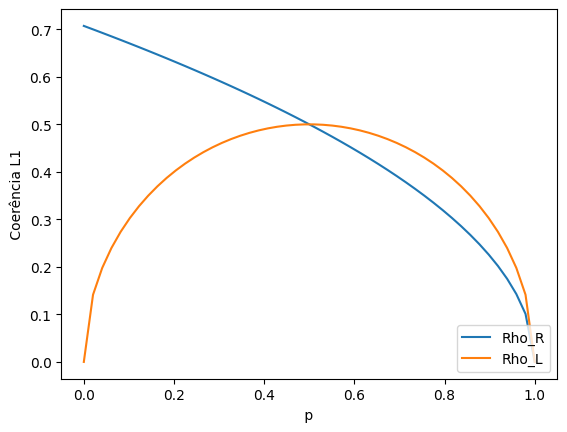

In [16]:
from numpy import linspace
import matplotlib.pyplot as plt
import numpy as np 
import math


def coh_l1(rho):  # normalized to [0,1]
    d = rho.shape[0]
    coh = 0.0
    for j in range(0, d-1):
        for k in range(j+1, d):
            coh += math.sqrt((rho[j][k].real)**2.0 + (rho[j][k].imag)**2.0)
    return 2.0*coh/(d-1)
#from theoric.theoric_tools import *
# theoric plot
#def plot_test(rho):
def pTraceL_num(dl, dr, rhoLR):
    # Returns the left partial trace over the 'left' subsystem of rhoLR
    rhoR = np.zeros((dr, dr), dtype=complex)
    for j in range(0, dr):
        for k in range(j, dr):
            for l in range(0, dl):
                rhoR[j,k] += rhoLR[l*dr+j,l*dr+k]
            if j != k:
                rhoR[k,j] = np.conj(rhoR[j,k])
    return rhoR

def pTraceR_num(dl, dr, rhoLR):
    # Returns the right partial trace over the 'right' subsystem of rhoLR
    rhoL = np.zeros((dl, dl), dtype=complex)
    for j in range(0, dl):
        for k in range(j, dl):
            for l in range(0, dr):
                rhoL[j,k] += rhoLR[j*dr+l,k*dr+l]
        if j != k:
            rhoL[k,j] = np.conj(rhoL[j,k])
    return rhoL

list_gamma = linspace(0,1,10)
list_gamma = [0]
list_p = linspace(0,1,50)

coerencias_R = []
coerencias_L = []
#for g in list_gamma:
for p in list_p:
    #rho = pd(pi/2, 0, p)
    rho = pd_ref(p)
    
    rho_R = pTraceR_num(2,2,rho)
    rho_L = pTraceL_num(2,2,rho)
    coh_R = coh_l1(rho_R)
    coh_L = coh_l1(rho_L)
    coerencias_R.append(coh_R)
    coerencias_L.append(coh_L)
plt.plot(list_p,coerencias_R,label='Rho_R')
plt.plot(list_p,coerencias_L,label='Rho_L')
plt.xlabel(' p ')
plt.ylabel(' Coerência L1 ')
plt.legend(loc=4)
plt.show()


In [ ]:
def pd_ref(p):
    state = zeros(4,dtype=complex)
    state[0] = 1/sqrt(2)
    state[1] = 0
    state[2] = sqrt((1-p)/2)
    state[3] = sqrt(p/2)
    target_op = outer(state.conj(), state)
    target_op = tensor(target_op)
    return target_op

In [10]:
def trace(A):
    d = A.shape[0]; tr = 0.0
    for j in range(0,d):
       tr += A[j,j]
    return tr

def ptraceA(da, db, rho):
    rhoB = zeros(db,db)
    for j in range(0, db):
        for k in range(0, db):
            for l in range(0, da):
                rhoB[j,k] += rho[l*db+j,l*db+k]
    return rhoB
#trace(result).subs(theta,pi).subs(gamma,0.5).subs(p,1)

1.00000000000000

In [ ]:
def pTraceL(dl, dr, rhoLR):
    # Returns the left partial trace over the 'left' subsystem of rhoLR
    rhoB = np.zeros((dr, dr), dtype=complex)
    for j in range(0, dr):
        for k in range(j, dr):
            for l in range(0, dl):
                rhoB[j][k] += rhoLR[l*dr+j][l*dr+k]
            if j != k:
                rhoB[k][j] = np.conj(rhoB[j][k])
    return rhoB
#trace(result).subs(theta,pi).subs(gamma,0.5).subs(p,1)

In [ ]:
from sympy.physics.quantum import TensorProduct
from sympy import conjugate

rho_AB = TensorProduct(conjugate(Psi_AB),Psi_AB)
rho_AB

Matrix([
[                                       cos(conjugate(theta)/2)*conjugate(sqrt(p))],
[      exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*conjugate(sqrt(gamma*p))],
[                     cos(conjugate(theta)/2)*conjugate(sqrt((1 - gamma)*(1 - p)))],
[                                                                                0],
[exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*conjugate(sqrt(p*(1 - gamma)))],
[                                                                                0],
[        exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*conjugate(sqrt(1 - p))],
[                  cos(conjugate(theta)/2)*conjugate(gamma)*conjugate(sqrt(1 - p))]])xMatrix([
[                           sqrt(p)*cos(theta/2)],
[      sqrt(gamma*p)*exp(1.0*I*phi)*sin(theta/2)],
[         sqrt((1 - gamma)*(1 - p))*cos(theta/2)],
[                                              0],
[sqrt(p*(1 - gamma))*exp(1.0*I*phi)*sin(theta/2)],
[                                             

In [ ]:
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
v1 = 2*N.i+3*N.j-N.k
v2 = N.i-4*N.j+N.k
v1.dot(v2)
v3 = v1.cross(v2)
v3

(-1)*N.i + (-3)*N.j + (-11)*N.k

In [ ]:
target_op = state_generalized_amplitude_damping(np.pi/2, 0, p,1)
alpha = eval(input("How many rows? "))
beta = eval(input("How many columns? "))

def make_matrix(alpha,beta):
    matrix_thing = SHIT.random.randint(0,50,(alpha,beta))
    return(matrix_thing)

matrix_sympy = Matrix(make_matrix(alpha, beta))